In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

Quarterly approximation:

Capital process:
$$
\log K_{t+1} - \log K_t = \alpha_k + \beta_k Z_t + \sigma_k (W_{t+1}-W_t)
$$


Z process:
$$
Z_{t+1} - Z_t = - \beta_z Z_t + \sigma_z (W_{t+1}-W_t)
$$

where $\alpha_c = .484, \beta_c = 1,  \beta_z=.014$.
$\sigma_c=\begin{bmatrix}.477 \\ 0\end{bmatrix}, \sigma_z=\begin{bmatrix}.011 \\ .025\end{bmatrix}$.

In [14]:
1./0.00256

390.62499999999994

In [2]:
α_c = .484
β_c = 1.
σ_c = np.array([.477, 0])
α_z = 0.
β_z = .014
σ_z = np.array([.011, .025])


@njit
def simulation(ws, N=100_000, T=40, dt=1/4.):
    """
    Simulate N paths of Z_t and C_t from t=1 to T.

    """
    var_z = dt*σ_z@σ_z/(1-(1-β_z*dt)**2)
    std_z = np.sqrt(var_z)
    
    time_periods = int(T/dt)
    z_path = np.zeros((N, time_periods+1))
    c_path = np.zeros((N, time_periods+1))
    for i in range(N):
        z0 = np.random.normal(0.,std_z)
        c0 = 0.
        z_path[i, 0] = z0
        c_path[i, 0] = c0
        for j in range(1, time_periods+1):
            c1 = c0 + (α_c + β_c*z0)*dt + σ_c@ws[i, j]*np.sqrt(dt)
            z1 = (1.-β_z*dt)*z0 + σ_z@ws[i, j]*np.sqrt(dt)
            c_path[i, j] = c1
            z_path[i, j] = z1
            c0 = c1
            z0 = z1
    return z_path, c_path

In [4]:
N = 1_000_000
T = 40
dt = 1./4.
np.random.seed(1)

ws = np.random.multivariate_normal(np.zeros(2), np.eye(2), (N, int(T/dt)))
res_z, res_c = simulation(ws, N, T, dt)

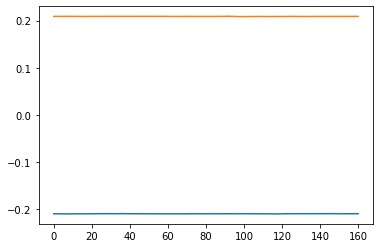

In [5]:
plt.plot(np.percentile(res_z, 10, axis=0))
plt.plot(np.percentile(res_z, 90, axis=0))

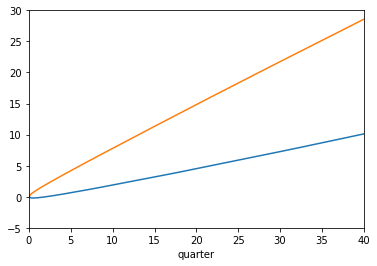

In [9]:
plt.plot(np.arange(0, T+dt, dt), np.percentile(res_c, 10, axis=0))
plt.plot(np.arange(0, T+dt, dt), np.percentile(res_c, 90, axis=0))
plt.ylim(-5, 30)
plt.xlim(0, 40)
plt.xlabel('quarter')
plt.savefig('plot.pdf')

In [13]:
δ = .01
η = .032
σ_z_annual = σ_z*2
σ_k_annual = σ_c*2

v_z = .04*(1-η)/(δ+.056)
v_k = 1-η

In [30]:
i_star = 0.09
σ_new = 0.0161
μ_k = -0.034977443912449
ϕ0 = 0.06
ϕ1 = 1/ϕ0
ϕ0*np.log(1+ϕ1*i_star)

0.054977443912449304

In [ ]:
# BBH
α

In [31]:
μ_k + ϕ0*np.log(1+ϕ1*i_star)

0.020000000000000302

In [32]:
α_k = -0.05
ioverk = 0.125
κ = 7.
α_k + ioverk - κ/2.*ioverk**2

0.020312499999999997

In [33]:
80/0.115

695.6521739130435